In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
pd.options.display.max_columns = 14

In [22]:
#load the dataset
boston = load_boston()

#convert the dataset to pandas dataframe
df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
df.head()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
#add the target to the dataframe in column "Price"
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
#separate the features and the target for the modelling
x_data = df.drop('Price', axis=1)
y_data = df['Price']

In [27]:
#Random Forest with Cross validation and Hyperparameter Tuning
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor
regressorHT = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_leaf_nodes': [None, 10, 20, 30],      # Maximum number of leaf nodes
    'min_samples_leaf': [1, 2, 5]              # Minimum number of samples required at a leaf node
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=regressorHT, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the hyperparameter tuning with cross-validation on the entire dataset
grid_search.fit(x_data, y_data)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model obtained from the grid search
best_regressor = grid_search.best_estimator_

# Make predictions on the entire dataset using the best model
y_pred = best_regressor.predict(x_data)

# Evaluate the model using metrics
mse = mean_squared_error(y_data, y_pred)
mae = mean_absolute_error(y_data, y_pred)
r2 = r2_score(y_data, y_pred)

# Print the evaluation metrics and best hyperparameters
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")


Best Hyperparameters: {'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Mean Squared Error: 1.43
Mean Absolute Error: 0.81
R-squared: 0.98


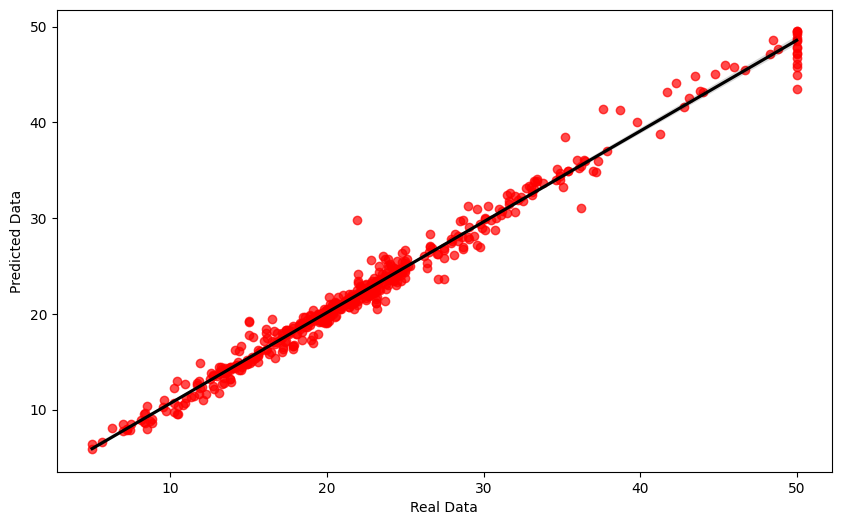

In [34]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_data, y=y_pred, scatter_kws={'color': 'red', 'alpha': 0.7}, line_kws={'color': 'black'})
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")
plt.show()

In [37]:
#create new data to predict using the model
new_data = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 78.9, 4.9671, 2, 242, 17.8, 396.9, 9.14]]

# Make predictions on the new input data using the trained model
predicted_price = best_regressor.predict(new_data)

# Print the predicted house prices
print(f"Prediction : ${predicted_price[0]:.2f}")

Prediction : $21.88


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
